In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path

sys.path.append("../../../analysisTools/")
import plotTools as ptools

In [2]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [3]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

# SR inclusive-BDT (trained on [5,100]GeV): run on all signal mass points [5, 100] GeV

## Background

In [4]:
prefix = './coffea/skimmed/'
suffix = '_SR_BDT_v5_vars_sig_v2_minDxyCut_BestVertex'

In [5]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

In [6]:
# efficiency
pd.options.display.float_format = '{:,.6f}'.format
bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow')

bkg_eff_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Top,0.000129,0.000013,0.000013,0.000008,0.000007,0.000007,0.000007,0.000007,0.000001,0.000000
DY,0.000011,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001,0.000000
Diboson,0.000637,0.000044,0.000044,0.000033,0.000031,0.000030,0.000030,0.000027,0.000005,0.000000
Triboson,0.001933,0.000158,0.000158,0.000104,0.000092,0.000091,0.000091,0.000076,0.000015,0.000000
W+jets,0.002310,0.000173,0.000173,0.000139,0.000132,0.000131,0.000131,0.000114,0.000020,0.000000
Z+jets,0.006645,0.000398,0.000398,0.000325,0.000310,0.000309,0.000309,0.000292,0.000073,0.000000
Total,0.000019,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
pd.options.display.float_format = '{:,.6f}'.format
cuts = bkg_eff_df.columns.values.tolist()
processes = bkg_eff_df.index.values.tolist()

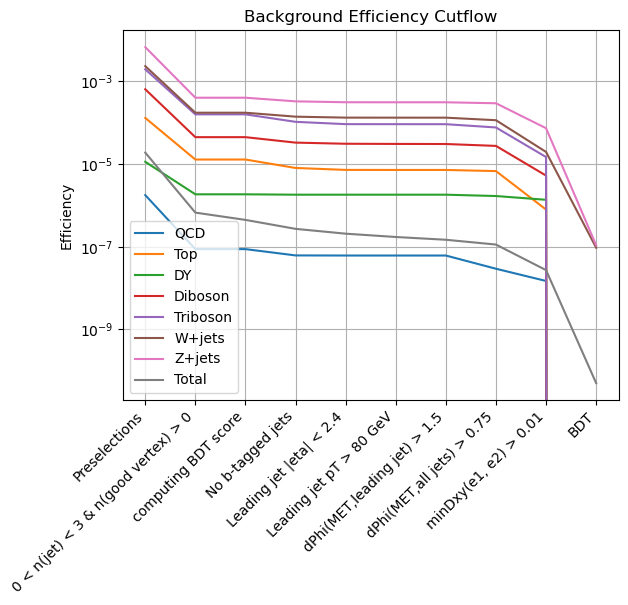

In [81]:
for process in processes:
    plt.plot(cuts, bkg_eff_df.loc[process], label=process)

plt.grid()
plt.yscale('log')
plt.ylabel('Efficiency')
plt.title('Background Efficiency Cutflow')

plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.legend()

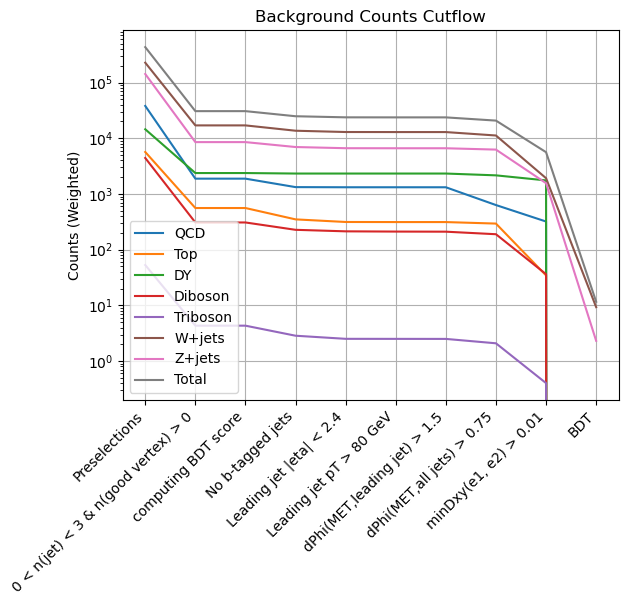

In [83]:
for process in processes:
    plt.plot(cuts, bkg_cts_df.loc[process], label=process)

plt.grid()
plt.yscale('log')
plt.ylabel('Counts (Weighted)')
plt.title('Background Counts Cutflow')

plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.legend()

In [7]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Background_Efficiency'

df_to_save = bkg_eff_df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_v5_vars_sig_v2_minDxyCut_Background_Efficiency.csv


In [8]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_cts')

bkg_cts_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,"38,039.83","1,882.67","1,882.67","1,326.86","1,319.01","1,319.01","1,318.41",632.25,320.05,0.00
Top,"5,667.49",559.22,559.22,349.76,314.03,312.99,312.95,294.00,34.52,0.00
DY,"14,495.72","2,373.75","2,373.75","2,325.57","2,325.57","2,325.57","2,325.57","2,157.97","1,750.49",0.00
Diboson,"4,424.20",307.91,307.91,227.24,213.36,211.27,210.33,189.35,36.30,0.00
Triboson,53.00,4.32,4.32,2.85,2.51,2.51,2.50,2.09,0.40,0.00
W+jets,"227,212.60","17,009.81","17,009.81","13,645.63","12,937.21","12,911.49","12,907.15","11,204.39","1,918.22",9.30
Z+jets,"142,220.15","8,524.55","8,524.55","6,957.67","6,625.48","6,613.11","6,612.30","6,256.76","1,561.49",2.31
Total,"432,113.00","30,662.23","30,662.23","24,835.58","23,737.17","23,695.95","23,689.22","20,736.81","5,621.48",11.62


In [9]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Background_EventCount_Weighted'

df_to_save = bkg_cts_df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_v5_vars_sig_v2_minDxyCut_Background_EventCount_Weighted.csv


In [10]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts')

bkg_cts_raw_df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,12311,381,381,160,159,159,158,3,2,0
Top,49818,4688,4688,3058,2348,2337,2336,2006,353,0
DY,205,14,14,12,12,12,12,10,3,0
Diboson,18067,1234,1234,915,860,852,848,767,149,0
Triboson,2257,170,170,116,106,105,104,92,13,0
W+jets,697657,48425,48425,37015,35472,35415,35377,29090,4981,30
Z+jets,1281459,67427,67427,52627,50986,50934,50903,44480,11198,19
Total,2061774,122339,122339,93903,89943,89814,89738,76448,16699,49


In [11]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_v5_vars_sig_v2_minDxyCut_Background_EventCount_Raw.csv


In [12]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 11.62


In [13]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['BDT']).transpose(), pd.DataFrame(bkg_cts_raw_df['BDT']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets,Total
Weighted Counts,0.00,0.00,0.00,0.00,0.00,9.30,2.31,11.62
Raw Counts,0.00,0.00,0.00,0.00,0.00,30.00,19.00,49.00


## Signal

In [14]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [15]:
si = utils.get_signal_point_dict(sig_histo)

pd.options.display.float_format = '{:,.1f}'.format
si

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,99.0,18.0,100.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,94.5,9.0,100.0,90.0,99.0,0.1,sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,99.0,18.0,1.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,99.0,18.0,10.0,90.0,108.0,0.2,sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,88.0,16.0,10.0,80.0,96.0,0.2,sig_2018_Mchi-88p0_dMchi-16p0_ctau-10
...,...,...,...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,105.0,10.0,100.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-100
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.5,1.0,10.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.5,1.0,1.0,10.0,11.0,0.1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,105.0,10.0,10.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-10


In [16]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)

cutnames

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'minDxy(e1, e2) > 0.01',
 'BDT']

### Efficiency

In [17]:
pd.options.display.float_format = '{:,.6f}'.format

In [18]:
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [19]:
table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

In [20]:
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.065041,0.015343,0.015343,0.012976,0.012527,0.012527,0.012527,0.012353,0.005919,0.003837
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,0.066110,0.013011,0.013011,0.011131,0.010744,0.010743,0.010743,0.010641,0.004921,0.002867
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,0.058112,0.011195,0.011195,0.009729,0.009420,0.009420,0.009420,0.009342,0.004104,0.002402
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,0.049041,0.011230,0.011230,0.009552,0.009201,0.009201,0.009201,0.009076,0.004674,0.003125
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,0.051428,0.009301,0.009301,0.007902,0.007672,0.007672,0.007672,0.007581,0.003520,0.001864
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,0.043559,0.007791,0.007791,0.006622,0.006351,0.006351,0.006351,0.006279,0.002960,0.001629
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,0.029875,0.007027,0.007027,0.005808,0.005631,0.005631,0.005631,0.005523,0.002973,0.002123
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,0.014484,0.001842,0.001842,0.001519,0.001421,0.001418,0.001418,0.001404,0.000673,0.000378
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,0.014782,0.002143,0.002143,0.001894,0.001811,0.001811,0.001811,0.001794,0.000739,0.000233
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,0.033826,0.006982,0.006982,0.005961,0.005695,0.005695,0.005695,0.005651,0.002849,0.002003


In [21]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-1_samples_Efficiency.csv


In [22]:
ct = 10.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.060097,0.011533,0.011533,0.009790,0.009461,0.009457,0.009457,0.009230,0.006412,0.004359
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,0.051928,0.009921,0.009921,0.008256,0.008034,0.008034,0.008034,0.007820,0.005582,0.003924
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,0.058330,0.009363,0.009363,0.007922,0.007656,0.007656,0.007656,0.007545,0.004917,0.003066
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,0.052317,0.008360,0.008360,0.007155,0.006897,0.006897,0.006897,0.006840,0.004388,0.002594
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,0.045542,0.008151,0.008151,0.006929,0.006680,0.006676,0.006676,0.006519,0.004433,0.002963
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,0.045232,0.006990,0.006990,0.006015,0.005827,0.005827,0.005827,0.005734,0.003562,0.002256
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,0.039166,0.005699,0.005699,0.004893,0.004680,0.004676,0.004676,0.004619,0.002797,0.001686
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,0.028663,0.005058,0.005058,0.004260,0.004136,0.004136,0.004136,0.003913,0.002879,0.002034
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,0.010930,0.001187,0.001187,0.000987,0.000935,0.000931,0.000931,0.000876,0.000490,0.000183
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,0.031125,0.005252,0.005252,0.004562,0.004329,0.004329,0.004329,0.004260,0.002828,0.001983


In [23]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-10_samples_Efficiency.csv


In [24]:
ct = 100.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.042898,0.005171,0.005171,0.004361,0.004208,0.004206,0.004206,0.004008,0.002521,0.001339
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.041559,0.004565,0.004565,0.003872,0.003775,0.003775,0.003775,0.003670,0.002115,0.001032
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.038143,0.004461,0.004461,0.003821,0.003680,0.003677,0.003677,0.003497,0.002169,0.001194
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,0.036959,0.004105,0.004105,0.003461,0.003353,0.003349,0.003349,0.003245,0.001888,0.000888
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,0.032554,0.003600,0.003600,0.003015,0.002870,0.002870,0.002870,0.002746,0.001563,0.000825
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,0.032810,0.003467,0.003467,0.002935,0.002837,0.002837,0.002837,0.002743,0.001475,0.000670
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,0.027190,0.002624,0.002624,0.002212,0.002100,0.002100,0.002100,0.002042,0.001065,0.000494
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,0.021028,0.002322,0.002322,0.001971,0.001921,0.001921,0.001921,0.001762,0.001134,0.000567
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,0.007306,0.000596,0.000596,0.000504,0.000475,0.000475,0.000475,0.000457,0.000151,0.000015
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,0.007414,0.000647,0.000647,0.000562,0.000528,0.000528,0.000528,0.000501,0.000174,0.000037


In [25]:
outdir = './csv/Cutflow/Efficiency/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_Efficiency'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-100_samples_Efficiency.csv


### Weighted Event count

In [26]:
pd.options.display.float_format = '{:,.2f}'.format

In [27]:
count_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [28]:
table = pd.DataFrame.from_dict(count_cutflow, orient='index')
table.columns = cutnames

In [29]:
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,51.58,12.17,12.17,10.29,9.93,9.93,9.93,9.80,4.69,3.04
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,627.11",320.24,320.24,273.97,264.43,264.40,264.40,261.91,121.11,70.57
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"2,122.81",408.93,408.93,355.40,344.10,344.10,344.10,341.27,149.92,87.76
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,90.58,20.74,20.74,17.64,16.99,16.99,16.99,16.76,8.63,5.77
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"2,928.06",529.56,529.56,449.92,436.79,436.79,436.79,431.62,200.41,106.12
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"4,153.77",742.93,742.93,631.48,605.60,605.60,605.60,598.76,282.26,155.33
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,5.68,1.33,1.33,1.10,1.07,1.07,1.07,1.05,0.56,0.40
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"2,748.24",349.57,349.57,288.31,269.62,268.98,268.98,266.40,127.74,71.63
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"62,382.76","9,045.04","9,045.04","7,993.01","7,642.38","7,642.38","7,642.38","7,572.31","3,120.28",982.22
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,205.19,42.35,42.35,36.16,34.55,34.55,34.55,34.28,17.28,12.15


In [30]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-1_samples_EventCount_Weighted.csv


In [31]:
# without m1 = 30 GeV
m1 = 30.0

points = (si["ctau"] == ct) & (si["m1"] != m1)

df = table.loc[list(si[points].name)]
df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,51.58,12.17,12.17,10.29,9.93,9.93,9.93,9.80,4.69,3.04
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,627.11",320.24,320.24,273.97,264.43,264.40,264.40,261.91,121.11,70.57
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"2,122.81",408.93,408.93,355.40,344.10,344.10,344.10,341.27,149.92,87.76
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,90.58,20.74,20.74,17.64,16.99,16.99,16.99,16.76,8.63,5.77
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"2,928.06",529.56,529.56,449.92,436.79,436.79,436.79,431.62,200.41,106.12
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"4,153.77",742.93,742.93,631.48,605.60,605.60,605.60,598.76,282.26,155.33
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,5.68,1.33,1.33,1.10,1.07,1.07,1.07,1.05,0.56,0.40
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"2,748.24",349.57,349.57,288.31,269.62,268.98,268.98,266.40,127.74,71.63
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"62,382.76","9,045.04","9,045.04","7,993.01","7,642.38","7,642.38","7,642.38","7,572.31","3,120.28",982.22
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,205.19,42.35,42.35,36.16,34.55,34.55,34.55,34.28,17.28,12.15


In [32]:
ct = 10.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,4.78,0.92,0.92,0.78,0.75,0.75,0.75,0.73,0.51,0.35
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,6.15,1.17,1.17,0.98,0.95,0.95,0.95,0.93,0.66,0.46
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,147.91,23.74,23.74,20.09,19.41,19.41,19.41,19.13,12.47,7.78
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,197.37,31.54,31.54,26.99,26.02,26.02,26.02,25.80,16.55,9.79
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,8.45,1.51,1.51,1.29,1.24,1.24,1.24,1.21,0.82,0.55
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,267.87,41.40,41.40,35.62,34.51,34.51,34.51,33.96,21.10,13.36
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,390.29,56.79,56.79,48.76,46.63,46.60,46.60,46.02,27.87,16.80
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,0.55,0.10,0.10,0.08,0.08,0.08,0.08,0.07,0.05,0.04
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,211.62,22.98,22.98,19.10,18.10,18.03,18.03,16.97,9.49,3.54
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,18.96,3.20,3.20,2.78,2.64,2.64,2.64,2.60,1.72,1.21


In [33]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-10_samples_EventCount_Weighted.csv


In [34]:
# without m1 = 30 GeV
m1 = 30.0

points = (si["ctau"] == ct) & (si["m1"] != m1)

df = table.loc[list(si[points].name)]
df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,4.78,0.92,0.92,0.78,0.75,0.75,0.75,0.73,0.51,0.35
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,6.15,1.17,1.17,0.98,0.95,0.95,0.95,0.93,0.66,0.46
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,147.91,23.74,23.74,20.09,19.41,19.41,19.41,19.13,12.47,7.78
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,197.37,31.54,31.54,26.99,26.02,26.02,26.02,25.80,16.55,9.79
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,8.45,1.51,1.51,1.29,1.24,1.24,1.24,1.21,0.82,0.55
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,267.87,41.40,41.40,35.62,34.51,34.51,34.51,33.96,21.10,13.36
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,390.29,56.79,56.79,48.76,46.63,46.60,46.60,46.02,27.87,16.80
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,0.55,0.10,0.10,0.08,0.08,0.08,0.08,0.07,0.05,0.04
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,211.62,22.98,22.98,19.10,18.10,18.03,18.03,16.97,9.49,3.54
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,18.96,3.20,3.20,2.78,2.64,2.64,2.64,2.60,1.72,1.21


In [35]:
ct = 100.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.34,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.01
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,10.55,1.16,1.16,0.98,0.96,0.96,0.96,0.93,0.54,0.26
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.45,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.03,0.01
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,13.98,1.55,1.55,1.31,1.27,1.27,1.27,1.23,0.71,0.34
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,0.61,0.07,0.07,0.06,0.05,0.05,0.05,0.05,0.03,0.02
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,19.49,2.06,2.06,1.74,1.69,1.69,1.69,1.63,0.88,0.40
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,27.17,2.62,2.62,2.21,2.10,2.10,2.10,2.04,1.06,0.49
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,443.66,36.19,36.19,30.61,28.82,28.82,28.82,27.73,9.16,0.92
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,14.29,1.25,1.25,1.08,1.02,1.02,1.02,0.96,0.33,0.07


In [36]:
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Weighted//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-100_samples_EventCount_Weighted.csv


In [37]:
# without m1 = 30 GeV
m1 = 30.0

points = (si["ctau"] == ct) & (si["m1"] != m1)

df = table.loc[list(si[points].name)]
df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.34,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.02,0.01
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,10.55,1.16,1.16,0.98,0.96,0.96,0.96,0.93,0.54,0.26
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.45,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.03,0.01
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,13.98,1.55,1.55,1.31,1.27,1.27,1.27,1.23,0.71,0.34
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,0.61,0.07,0.07,0.06,0.05,0.05,0.05,0.05,0.03,0.02
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,19.49,2.06,2.06,1.74,1.69,1.69,1.69,1.63,0.88,0.40
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,27.17,2.62,2.62,2.21,2.10,2.10,2.10,2.04,1.06,0.49
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,443.66,36.19,36.19,30.61,28.82,28.82,28.82,27.73,9.16,0.92
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,14.29,1.25,1.25,1.08,1.02,1.02,1.02,0.96,0.33,0.07


### Raw count

In [38]:
pd.options.display.float_format = '{:,.0f}'.format

In [39]:
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [40]:
table = pd.DataFrame.from_dict(raw_cutflow, orient='index')
table.columns = cutnames

In [41]:
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,31711,7481,7481,6327,6108,6108,6108,6023,2886,1871
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,48974,9639,9639,8246,7959,7958,7958,7883,3645,2124
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12770,2460,2460,2138,2070,2070,2070,2053,902,528
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,10607,2429,2429,2066,1990,1990,1990,1963,1011,676
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,13602,2460,2460,2090,2029,2029,2029,2005,931,493
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,11551,2066,2066,1756,1684,1684,1684,1665,785,432
sig_2018_Mchi-60p0_dMchi-20p0_ctau-1,7768,1827,1827,1510,1464,1464,1464,1436,773,552
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,4261,542,542,447,418,417,417,413,198,111
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,3558,516,516,456,436,436,436,432,178,56
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,761,157,157,134,128,128,128,127,64,45


In [42]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_EventCount_Raw'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-1_samples_EventCount_Raw.csv


In [43]:
ct = 10.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,31933,6128,6128,5202,5027,5025,5025,4904,3407,2316
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,7516,1436,1436,1195,1163,1163,1163,1132,808,568
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,32183,5166,5166,4371,4224,4224,4224,4163,2713,1692
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,9944,1589,1589,1360,1311,1311,1311,1300,834,493
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,10438,1868,1868,1588,1531,1530,1530,1494,1016,679
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,10806,1670,1670,1437,1392,1392,1392,1370,851,539
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,11566,1683,1683,1445,1382,1381,1381,1364,826,498
sig_2018_Mchi-60p0_dMchi-20p0_ctau-10,7429,1311,1311,1104,1072,1072,1072,1014,746,527
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,3168,344,344,286,271,270,270,254,142,53
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,3609,609,609,529,502,502,502,494,328,230


In [44]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_EventCount_Raw'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-10_samples_EventCount_Raw.csv


In [45]:
ct = 100.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
#df.loc["Total"] = df.sum()

df

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,23255,2803,2803,2364,2281,2280,2280,2173,1367,726
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,25608,2813,2813,2386,2326,2326,2326,2261,1303,636
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,10603,1240,1240,1062,1023,1022,1022,972,603,332
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,8905,989,989,834,808,807,807,782,455,214
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,7894,873,873,731,696,696,696,666,379,200
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,9055,957,957,810,783,783,783,757,407,185
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,7990,771,771,650,617,617,617,600,313,145
sig_2018_Mchi-60p0_dMchi-20p0_ctau-100,5452,602,602,511,498,498,498,457,294,147
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,10655,869,869,735,692,692,692,666,220,22
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,2177,190,190,165,155,155,155,147,51,11


In [46]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-{int(ct)}_samples_EventCount_Raw'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/EventCount_Raw//SR_BDT_v5_vars_sig_v2_minDxyCut_Signal_ctau-100_samples_EventCount_Raw.csv


In [116]:
ct = 100.0
delta = 0.1

points = ((si["ctau"] == ct) & (si["delta"] == delta))

table = pd.DataFrame.from_dict(eff_cutflow, orient='index')
table.columns = cutnames

df = table.loc[list(si[points].name)]

m1_list = []
delta_list = []
ctau_list = []

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1_list.append(sig_dict['m1'])
    delta_list.append(sig_dict['delta'])
    ctau_list.append(sig_dict['ctau'])

df['m1'] = m1_list
df['delta'] = delta_list
df['ctau'] = ctau_list

df = df.sort_values(by=['m1']) # sort by m1

df.pop('m1')
df.pop('delta')
df.pop('ctau')

sig_2018_Mchi-5p25_dMchi-0p5_ctau-100     100.000000
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100     100.000000
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100     100.000000
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100     100.000000
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100     100.000000
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100     100.000000
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100     100.000000
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100     100.000000
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100     100.000000
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100     100.000000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100   100.000000
Name: ctau, dtype: float64

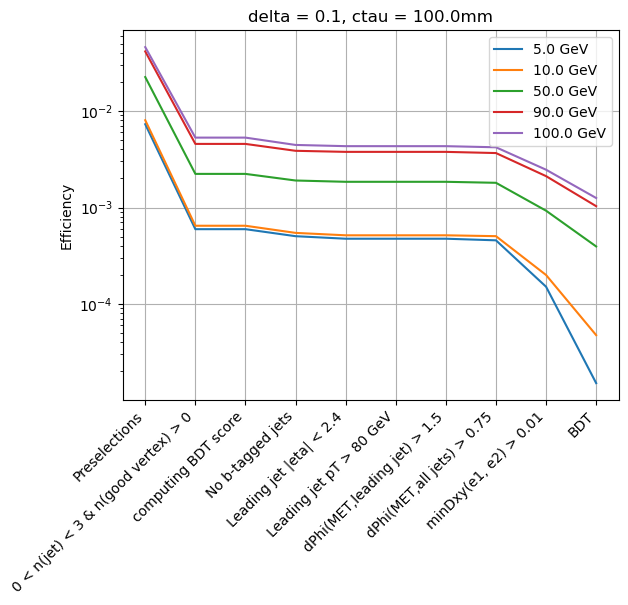

In [117]:
m1s = [5, 10, 50, 90, 100]

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = sig_dict['m1']
    #delta = sig_dict['delta'])
    #ctau = sig_dict['ctau'])
    if m1 in m1s:
        plt.plot(cuts, df.loc[point], label=f'{m1} GeV')

plt.grid()
plt.yscale('log')
plt.ylabel('Efficiency')
plt.title(f'delta = {delta}, ctau = {ct}mm')
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
plt.legend()

In [118]:
delta = 0.1

points = ((si["ctau"] == ct) & (si["delta"] == delta))

table = pd.DataFrame.from_dict(count_cutflow, orient='index')
table.columns = cutnames

df = table.loc[list(si[points].name)]

m1_list = []
delta_list = []
ctau_list = []

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1_list.append(sig_dict['m1'])
    delta_list.append(sig_dict['delta'])
    ctau_list.append(sig_dict['ctau'])

df['m1'] = m1_list
df['delta'] = delta_list
df['ctau'] = ctau_list

df = df.sort_values(by=['m1']) # sort by m1

df.pop('m1')
df.pop('delta')
df.pop('ctau')

sig_2018_Mchi-5p25_dMchi-0p5_ctau-100     100.000000
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100     100.000000
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100     100.000000
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100     100.000000
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100     100.000000
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100     100.000000
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100     100.000000
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100     100.000000
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100     100.000000
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100     100.000000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100   100.000000
Name: ctau, dtype: float64

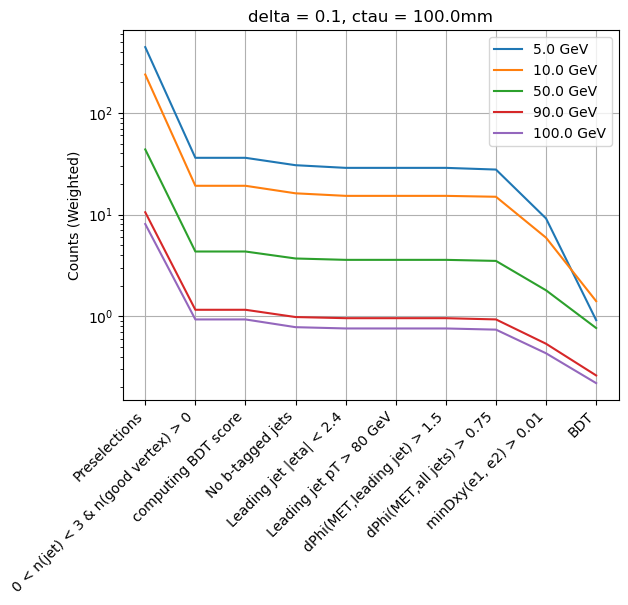

In [119]:
m1s = [5, 10, 50, 90, 100]

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = sig_dict['m1']
    #delta = sig_dict['delta'])
    #ctau = sig_dict['ctau'])
    if m1 in m1s:
        plt.plot(cuts, df.loc[point], label=f'{m1} GeV')

plt.grid()
plt.yscale('log')
plt.ylabel('Counts (Weighted)')
plt.title(f'delta = {delta}, ctau = {ct}mm')
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
plt.legend()

In [92]:
df.loc['sig_2018_Mchi-5p25_dMchi-0p5_ctau-10']

Preselections                         0.010676
0 < n(jet) < 3 & n(good vertex) > 0   0.001022
computing BDT score                   0.001022
No b-tagged jets                      0.000847
Leading jet |eta| < 2.4               0.000792
Leading jet pT > 80 GeV               0.000792
dPhi(MET,leading jet) > 1.5           0.000792
dPhi(MET,all jets) > 0.75             0.000771
minDxy(e1, e2) > 0.01                 0.000331
BDT                                   0.000081
Name: sig_2018_Mchi-5p25_dMchi-0p5_ctau-10, dtype: float64

## S/sqrt(B)

In [47]:
nBkg

11.617713863700969

In [48]:
count_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = pd.DataFrame.from_dict(count_cutflow, orient='index')
table.columns = cutnames

In [49]:
pd.options.display.float_format = '{:,.4f}'.format

In [50]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut

m1_list = []
delta_list = []
ctau_list = []

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1_list.append(sig_dict['m1'])
    delta_list.append(sig_dict['delta'])
    ctau_list.append(sig_dict['ctau'])

df['m1'] = m1_list
df['delta'] = delta_list
df['ctau'] = ctau_list

df = df.sort_values(by=['m1']) # sort by m1

In [51]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [52]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df

,Signal,m1,delta,ctau,Background
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,71.6289,5.0000,0.2000,1.0000,11.6177
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,46.2619,5.0000,0.1000,10.0000,11.6177
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,982.2221,5.0000,0.1000,1.0000,11.6177
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,0.0721,5.0000,0.2000,100.0000,11.6177
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,0.9164,5.0000,0.1000,100.0000,11.6177
...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,2.2801,100.0000,0.2000,1.0000,11.6177
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.0094,100.0000,0.2000,100.0000,11.6177
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.2201,100.0000,0.1000,100.0000,11.6177
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,6.5790,100.0000,0.1000,10.0000,11.6177


In [53]:
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]
df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,71.6289,11.6177,21.0149
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,46.2619,11.6177,13.5726
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,982.2221,11.6177,288.1704
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0000,0.2000,100.0000,0.0721,11.6177,0.0212
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,0.9164,11.6177,0.2689
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,2.2801,11.6177,0.6689
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,100.0000,0.2000,100.0000,0.0094,11.6177,0.0028
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.2201,11.6177,0.0646
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,6.5790,11.6177,1.9302


In [54]:
outdir = './csv/SR_Yields/'
outname = f'SR_BDT_v5_vars_sig_v2_minDxyCut_S_over_B'

df_to_save = df

save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_BDT_v5_vars_sig_v2_minDxyCut_S_over_B.csv


### ctau = 1mm signal points

In [55]:
ct = 1.0

In [56]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,982.2221,11.6177,288.1704
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,970.7532,11.6177,284.8056
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,904.0400,11.6177,265.2329
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"1,004.9867",11.6177,294.8492
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,583.8057,11.6177,171.2805
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,240.4011,11.6177,70.5304
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,155.3340,11.6177,45.5728
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,106.1233,11.6177,31.1351
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,87.7566,11.6177,25.7466
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,70.5740,11.6177,20.7054


In [57]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,71.6289,11.6177,21.0149
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,46.5173,11.6177,13.6475
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,43.0441,11.6177,12.6286
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"2,391.9760",11.6177,701.7727
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,25.5268,11.6177,7.4892
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,12.1530,11.6177,3.5655
65,60.0,0.2,1.0,0.0000,11.6177,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,5.7725,11.6177,1.6936
68,80.0,0.2,1.0,0.0000,11.6177,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,3.0431,11.6177,0.8928


### ctau = 10mm signal points

In [58]:
ct = 10.0

In [59]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 10mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,46.2619,11.6177,13.5726
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,73.1814,11.6177,21.4704
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,84.5687,11.6177,24.8113
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"1,056.0984",11.6177,309.8447
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,63.1191,11.6177,18.5183
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,25.8009,11.6177,7.5696
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,16.8022,11.6177,4.9295
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,13.3616,11.6177,3.9201
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,9.7866,11.6177,2.8712
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,7.7757,11.6177,2.2813


In [60]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 10mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,3.5422,11.6177,1.0392
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,2.9937,11.6177,0.8783
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,3.6892,11.6177,1.0824
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,739.6564,11.6177,217.0050
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,2.4785,11.6177,0.7271
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,1.2083,11.6177,0.3545
66,60.0,0.2,10.0,0.0000,11.6177,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,0.5496,11.6177,0.1612
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,0.4647,11.6177,0.1363
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,0.3465,11.6177,0.1017


### ctau = 100mm signal points

In [61]:
ct = 100.0

In [62]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 100mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,0.9164,11.6177,0.2689
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,1.4092,11.6177,0.4134
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,1.7414,11.6177,0.5109
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,285.1803,11.6177,83.6680
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,1.7236,11.6177,0.5057
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,0.7665,11.6177,0.2249
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,0.4932,11.6177,0.1447
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,0.3983,11.6177,0.1169
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,0.3358,11.6177,0.0985
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,0.2620,11.6177,0.0769


In [63]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 100mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.0721,11.6177,0.0212
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.0455,11.6177,0.0134
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.0906,11.6177,0.0266
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,22.6332,11.6177,6.6403
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.0643,11.6177,0.0189
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.0315,11.6177,0.0092
67,60.0,0.2,100.0,0.0000,11.6177,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0153,11.6177,0.0045
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0141,11.6177,0.0041
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0106,11.6177,0.0031
